# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Emotions Analysis </p>

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Importing Libraries</p>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Word Cloud
from wordcloud import WordCloud
# from textacy import preprocessing
from nltk.stem.snowball import SnowballStemmer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re

2024-03-02 01:13:34.237544: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered

2024-03-02 01:13:34.237633: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered

2024-03-02 01:13:34.379483: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Loading Data</p>


In [ ]:
# Load Data
df = pd.read_csv('text.csv')
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
# Shape Of Data
print(f'The Shape Of Data Is : {df.shape}')

The Shape Of Data Is : (416809, 3)


In [ ]:
# Null Values
df.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

In [ ]:
# Duplicates
df.duplicated().sum()

0

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Renaming The Columns Names</p>


In [ ]:
# Rename Columns
df.rename(columns={'text': 'Text', 'label': 'Label'}, inplace=True)
# Dropping the Index Colums
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
# Head Of Data
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
# Lets Rename Label also {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
df['Label'] = df['Label'].replace(0,'Sadness')
df['Label'] = df['Label'].replace(1,'Joy')
df['Label'] = df['Label'].replace(2,'Love')
df['Label'] = df['Label'].replace(3,'Anger')
df['Label'] = df['Label'].replace(4,'Fear')
df['Label'] = df['Label'].replace(5,'Surprise')

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Label Count</p>


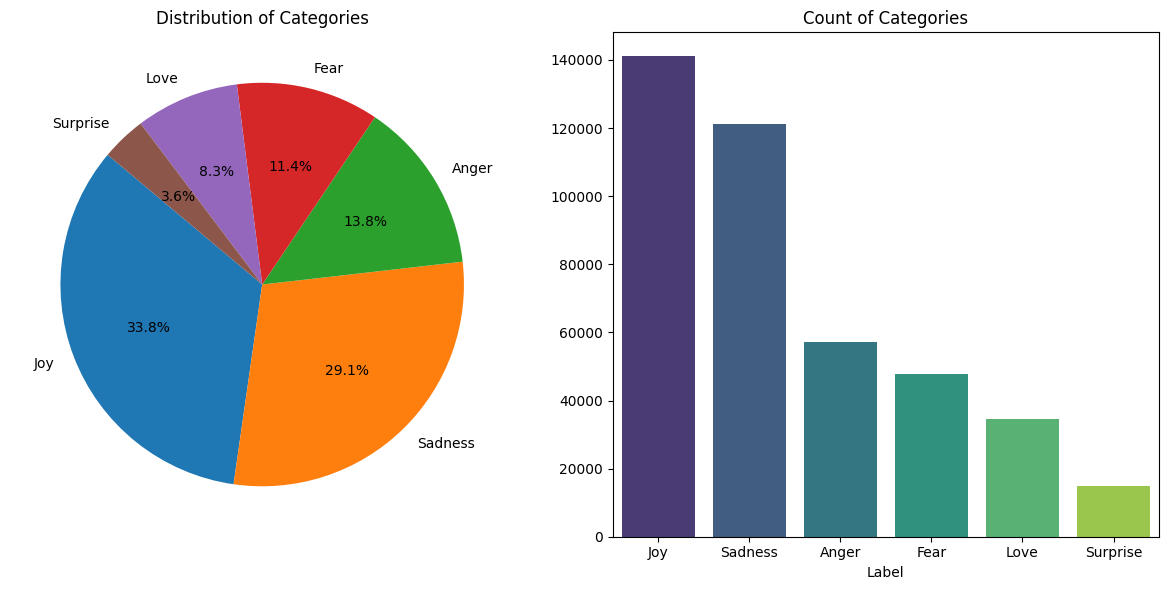

In [ ]:
# Value Count Of Label
count = df['Label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Two Seperate Data Set for Visualizng text</p>

In [ ]:
# Make Seperate Data Set to Visualize text
# Sadness
df_sadness = df[df['Label']=='Sadness']
# Joy
df_joy = df[df['Label']=='Joy']
# Love
df_love = df[df['Label']=='Love']
# Anger
df_anger = df[df['Label']=='Anger']
# Fear
df_fear = df[df['Label']=='Fear']
# Surprise
df_surprise = df[df['Label']=='Surprise']

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Visualizing Text Using Word Cloud</p>

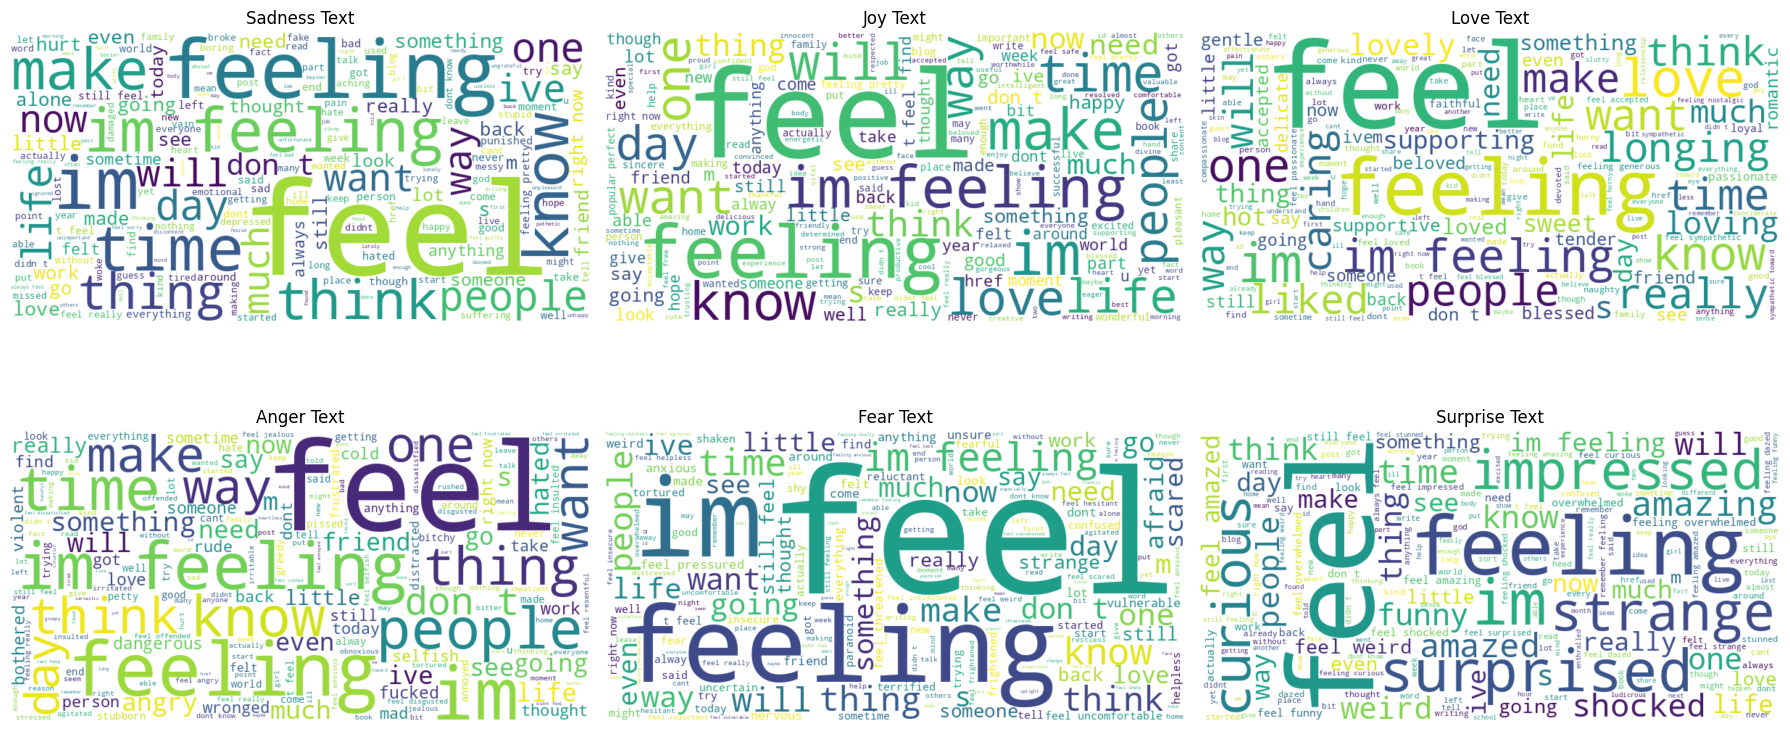

In [ ]:
# Combine text from different categories
combined_sadness_text = ' '.join(df_sadness['Text'])
combined_joy_text = ' '.join(df_joy['Text'])
combined_love_text = ' '.join(df_love['Text'])
combined_anger_text = ' '.join(df_anger['Text'])
combined_fear_text = ' '.join(df_fear['Text'])
combined_surprise_text = ' '.join(df_surprise['Text'])

# Create word clouds
sadness_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_sadness_text)
joy_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_joy_text)
love_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_love_text)
anger_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_anger_text)
fear_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_fear_text)
surprise_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_surprise_text)

# Plot the word clouds
plt.figure(figsize=(18, 9))

plt.subplot(2, 3, 1)
plt.imshow(sadness_wordcloud, interpolation='bilinear')
plt.title('Sadness Text')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(joy_wordcloud, interpolation='bilinear')
plt.title('Joy Text')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(love_wordcloud, interpolation='bilinear')
plt.title('Love Text')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(anger_wordcloud, interpolation='bilinear')
plt.title('Anger Text')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(fear_wordcloud, interpolation='bilinear')
plt.title('Fear Text')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(surprise_wordcloud, interpolation='bilinear')
plt.title('Surprise Text')
plt.axis('off')

plt.tight_layout()
plt.show()

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Encode Label again</p>

In [ ]:
# Now Unrename Label again
df['Label'] = df['Label'].replace('Sadness',0)
df['Label'] = df['Label'].replace('Joy',1)
df['Label'] = df['Label'].replace('Love',2)
df['Label'] = df['Label'].replace('Anger',3)
df['Label'] = df['Label'].replace('Fear',4)
df['Label'] = df['Label'].replace('Surprise',5)

/tmp/ipykernel_34/488500057.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

  df['Label'] = df['Label'].replace('Surprise',5)


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Text Preprocessing</p>

In [ ]:
# Import Basis Needed Libaries
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK resources (uncomment the following line if not already downloaded)?
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...

[nltk_data]   Package punkt is already up-to-date!

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...

[nltk_data]   Package stopwords is already up-to-date!


True

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Remove Url's</p>

In [ ]:
# Step 1: Remove URLs
df['Text'] = df['Text'].str.replace(r'http\S+', '', regex=True)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text  Label

0      i just feel really helpless and heavy hearted      4

1  ive enjoyed being able to slouch about relax a...      0

2  i gave up my internship with the dmrg and am f...      4

3                         i dont know i feel so lost      0

4  i am a kindergarten teacher and i am thoroughl...      4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Remove Special Characters and Punctuation</p>

In [ ]:
# Step 2: Remove special characters and punctuation
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '', regex=True)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text  Label

0      i just feel really helpless and heavy hearted      4

1  ive enjoyed being able to slouch about relax a...      0

2  i gave up my internship with the dmrg and am f...      4

3                         i dont know i feel so lost      0

4  i am a kindergarten teacher and i am thoroughl...      4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Remove WhiteSpaces Extra's</p>

In [ ]:
# Step 3: Remove extra whitespaces
df['Text'] = df['Text'].str.replace(r'\s+', ' ', regex=True)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text  Label

0      i just feel really helpless and heavy hearted      4

1  ive enjoyed being able to slouch about relax a...      0

2  i gave up my internship with the dmrg and am f...      4

3                         i dont know i feel so lost      0

4  i am a kindergarten teacher and i am thoroughl...      4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Remove Numeric Values in Text</p>

In [ ]:
# Step : 4 Remove numeric values
df['Text'] = df['Text'].str.replace(r'\d+', '', regex=True)

# Head
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Lower Casing text</p>

In [ ]:
# Step 6: Lowercasing
df['Text'] = df['Text'].str.lower()

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text  Label

0      i just feel really helpless and heavy hearted      4

1  ive enjoyed being able to slouch about relax a...      0

2  i gave up my internship with the dmrg and am f...      4

3                         i dont know i feel so lost      0

4  i am a kindergarten teacher and i am thoroughl...      4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Remove Stopwords</p>

In [ ]:
# Step 8: Remove stop words
stop = stopwords.words('english')
df["Text"] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Display the first few rows of the DataFrame to verify the changes
df.head()

,Text,Label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Remove Non-alpha Numeric</p>

In [ ]:
# Step : 9 Remove non-alphanumeric characters from the 'Text' column
df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Display the first few rows of the DataFrame to verify the changes
df.head()

,Text,Label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Train Test Split</p>

In [ ]:
X = df['Text']
y = df['Label']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (333447,)

X_test shape: (83362,)

y_train shape: (333447,)

y_test shape: (83362,)


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Tokenization and Padding Sequences</p>

In [ ]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Max Len in X_train_sequences
maxlen = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 79


In [ ]:
# Perform padding on X_train and X_test sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post',)
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

# Print the padded sequences for X_train and X_test
print("X_train_padded:")
print(X_train_padded)
print("\nX_test_padded:")
print(X_test_padded)

X_train_padded:

[[   16 30399    69 ...     0     0     0]

 [  268     5   723 ...     0     0     0]

 [    1    44   721 ...     0     0     0]

 ...

 [    1   591     0 ...     0     0     0]

 [    4    15   473 ...     0     0     0]

 [    1   147  1739 ...     0     0     0]]



X_test_padded:

[[  120    39   169 ...     0     0     0]

 [ 3033 14468   785 ...     0     0     0]

 [  188   303    48 ...     0     0     0]

 ...

 [  841   271  1955 ...     0     0     0]

 [ 1907  7254   634 ...     0     0     0]

 [   82     1   400 ...     0     0     0]]


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Input Size</p>

In [ ]:
# Embedding Input Size / Vocabulary Size
input_Size = np.max(X_train_padded) + 1
input_Size

50000

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Model Building</p>

In [ ]:
# Define the model
model = Sequential()

# Add embedding layer
model.add(Embedding(input_dim=input_Size, output_dim=50, input_length=maxlen))

# Dropout
model.add(Dropout(0.5))

# Add Bidirectional LSTM layer
model.add(Bidirectional(GRU(120, return_sequences=True)))
model.add(Bidirectional(GRU(64, return_sequences=True)))

#Batch Normalization
model.add(BatchNormalization())

# Add Bidirectional GRU layer
model.add(Bidirectional(GRU(64)))

# Add output layer
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_2"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 embedding_2 (Embedding)     (None, 79, 50)            2500000   

                                                                 

 dropout_1 (Dropout)         (None, 79, 50)            0         

                                                                 

 bidirectional_6 (Bidirecti  (None, 79, 240)           123840    

 onal)                                                           

                                                                 

 bidirectional_7 (Bidirecti  (None, 79, 128)           117504    

 onal)                                                           

                                                                 

 batch_normalization_2 (Bat  (None, 79, 128)           512       

 chNormalization)                                                

                                      

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Model Fitting</p>

In [ ]:
# Model Train
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=1500, validation_data=(X_test_padded, y_test))

Epoch 1/5

223/223 [==============================] - 46s 166ms/step - loss: 0.4648 - accuracy: 0.8203 - val_loss: 0.6911 - val_accuracy: 0.8489

Epoch 2/5

223/223 [==============================] - 34s 151ms/step - loss: 0.1137 - accuracy: 0.9362 - val_loss: 0.1204 - val_accuracy: 0.9359

Epoch 3/5

223/223 [==============================] - 33s 147ms/step - loss: 0.0970 - accuracy: 0.9401 - val_loss: 0.0942 - val_accuracy: 0.9377

Epoch 4/5

223/223 [==============================] - 33s 147ms/step - loss: 0.0919 - accuracy: 0.9420 - val_loss: 0.0943 - val_accuracy: 0.9382

Epoch 5/5

223/223 [==============================] - 32s 145ms/step - loss: 0.0890 - accuracy: 0.9426 - val_loss: 0.0943 - val_accuracy: 0.9358


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Visualizing Results</p>

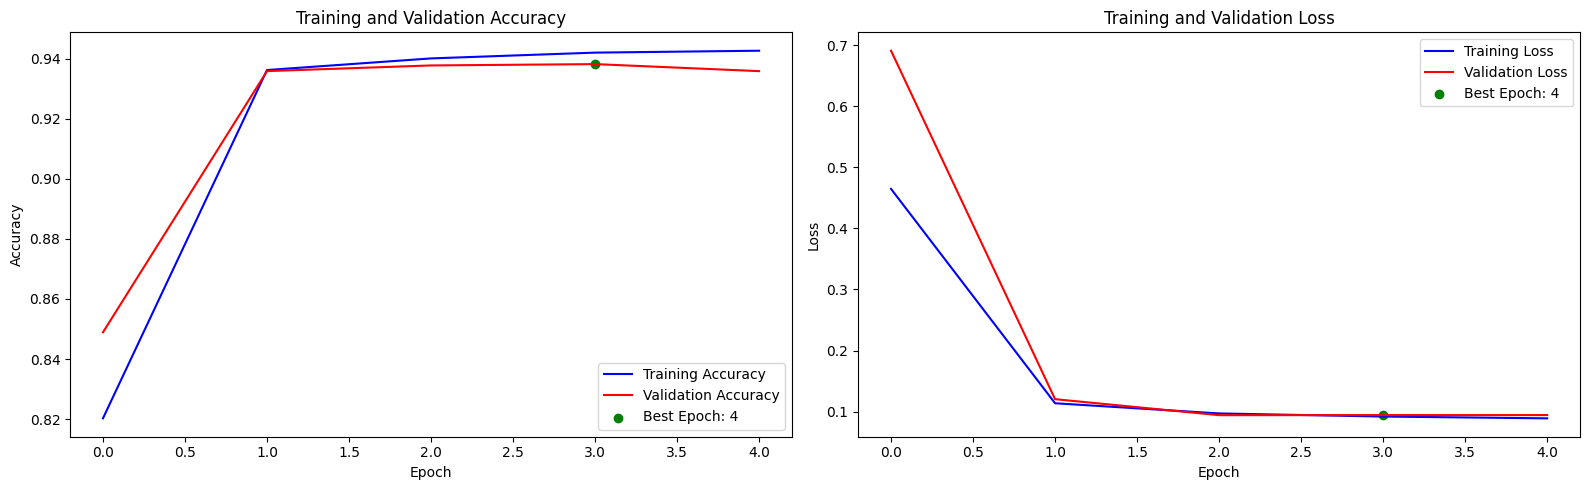

In [ ]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()


# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Test Accuracy</p>

In [ ]:
# Evaluate Test Data
model.evaluate(X_test_padded, y_test)

2606/2606 [==============================] - 31s 12ms/step - loss: 0.0943 - accuracy: 0.9358


[0.09433487057685852, 0.9358460903167725]

In [ ]:
# Predictions On Test For Confustion Matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_padded)
y_pred = np.argmax(y_pred, axis=1)

2606/2606 [==============================] - 27s 10ms/step


<Axes: >

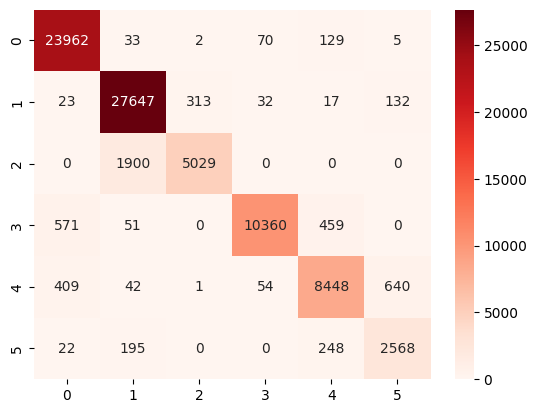

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')